In [2]:
# Importing the necessary libraries

import pandas as pd
from scipy.stats import sem
import matplotlib.pyplot as plt 
import matplotlib
import numpy as np
from matplotlib.lines import Line2D
from matplotlib import gridspec
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

# FIGURE 3

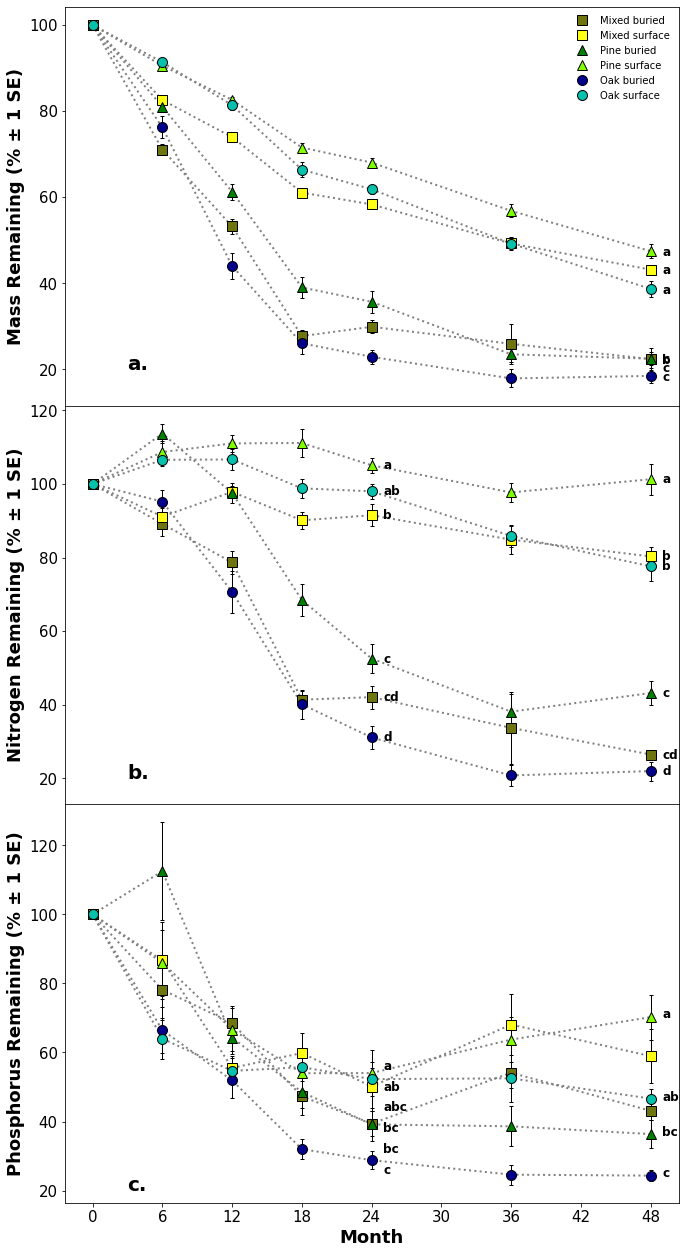

In [3]:
###################################
# Fig 3A
###################################
# Importing the mass csv data file
mass = pd.read_csv('/Users/preshitadave/Desktop/Dave_Preshita_BF550_Project2/Data/Fig3/biomass.csv')
mass = mass.dropna() # drop the NaN rows

#separating and creating new dataframes by type of litter, position and months
collection = mass.groupby(['Litter type','Position','Months'])

# create a dict to store all the standard error mean (sem) values
std_dict = {}
for i in collection:
    std = sem(i[1]['Percent Mass remaining']) # for the sem calculation to plot the boundaries
    mean = i[1]['Percent Mass remaining'].mean() # mean values
    std_dict[i[0]] = (mean, std)


# defining the markers, their colors and labels for all the subplots
markers = ["s"]*12+ ["^"]*12 + ["o"]*12
colors = ['#6E750E']*6+['#FFFF14']*6+['#008000']*6+['chartreuse']*6+['#00008B']*6+['#06C2AC']*6
labels = ['Mixed buried']*6+['Mixed surface']*6+['Pine buried']*6+['Pine surface']*6+ ['Oak buried']*6+['Oak surface']*6

# defining the size of the figure
fig = plt.figure(figsize=(11,22))
# defining the number of subplots
gs = gridspec.GridSpec(3, 1)  

# setting the subplot order and ax for plotting subplot1
ax1 = plt.subplot(gs[0])
ax1.set_xlabel('Month', fontsize = 18, fontweight='bold') #define xlabel 
ax1.set_ylabel('Mass Remaining (% {} 1 SE)'.format(u"\u00B1"), fontsize = 18, fontweight='bold') #define ylabel

#set ticks on both axes 
ax1.xaxis.set_ticks(np.arange(0,49,6))
ax1.yaxis.set_ticks(np.arange(0,101,20))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# i acts as a counter and helps to plot the initial starting point at time t=0
i=0

data_points = {} # creating an empty dict to store the mean at every time point for all catrgories which act as keys
for ind,k in enumerate(std_dict): #iterating through the std_dict dict
    #plots the marker and the error bar at each time point for each category stored in the std_dict
    ax1.errorbar(int(k[-1]), std_dict[k][0], xerr=None,yerr=std_dict[k][1], color=colors[ind], label=labels[ind], marker = markers[ind], markersize=10,markeredgecolor='black', ecolor = 'black', linestyle='--',linewidth=1, markeredgewidth=1, elinewidth=1, capsize = 2)
    
    #counter helps to plot the initial starting point once for each category
    if i%6==0:
        #plotting the marker at time t=0
        ax1.errorbar(0, 100, linestyle='--',linewidth=1, markeredgewidth=1, markersize=10,elinewidth=1, capsize=2, color=colors[ind], label=labels[ind], marker = markers[ind], markeredgecolor='black', ecolor = 'black')
        #creating the first instance for every category
        data_points[k[0]+' '+k[1]] = [100]
    
    # appending the mean values 
    data_points[k[0]+' '+k[1]].append(std_dict[k][0])
    i+=1

# adding the dotted lines that connect the markers in a particular category    
for k, v in data_points.items(): # iterating through the data_points dict
    ax1.plot([0,6,12,18,24,36,48],v, linestyle='dotted', color='grey', linewidth=2) #plotting the dotted gray line

# markers, colors and labels are defined for creating the specific legend that will be present in the first subplot
markers_legend = ["s"]*2+ ["^"]*2 + ["o"]*2
colors_legend = ['#6E750E']+['#FFFF14']+['#008000']+['chartreuse']+['#00008B']+['#06C2AC']
labels_legend = ['Mixed buried']+['Mixed surface']+['Pine buried']+['Pine surface']+ ['Oak buried']+['Oak surface']

# Creating the legend  
legend_elements = []
for i in range(6):
    legend_elements.append(Line2D([0], [0], markerfacecolor=colors_legend[i], color='w', label=labels_legend[i], marker = markers_legend[i], markersize=10,markeredgecolor='black'))
ax1.legend(handles=legend_elements, loc='upper right', frameon=False)

# annotating the subplot based on position
ax1.annotate('a.', xy=(3,20), fontsize=20, fontweight='bold')

# annotating within the subplot based on results calculated in Table 2
labels_annotate = ['b','a','c','a','c','a']
for i,j in enumerate(data_points.values()):
    ax1.annotate(labels_annotate[i], xy=(49,j[-1]-1), fontsize=12, fontweight='bold')
ax1.annotate('c', xy = (49,19.5), fontsize=12, fontweight='bold')



###################################
# Fig 3B
###################################

# Importing the nitrogen csv data file
nitrogen = pd.read_csv('/Users/preshitadave/Desktop/Dave_Preshita_BF550_Project2/Data/Fig3/nitrogen.csv')
nitrogen=nitrogen.dropna() # drop the NaN rows

#separating and creating new dataframes by type of litter, position and months
collection = nitrogen.groupby(['Litter type','Position','Months'])

# create a dict to store all the sem values
std_dict = {}
for i in collection:
    std = sem(i[1]['Percent N mass remaining']) # for the sem calculation to plot the boundaries
    mean = i[1]['Percent N mass remaining'].mean() # mean values
    std_dict[i[0]] = (mean, std)

# setting the subplot order and axis for subplot 2 
ax2 = plt.subplot(gs[1], sharex = ax1)
# setting x and y labels
ax2.set_xlabel('Month', fontsize = 18, fontweight='bold')
ax2.set_ylabel('Nitrogen Remaining (% {} 1 SE)'.format(u"\u00B1"), fontsize = 18, fontweight='bold')

#set ticks on both axes 
ax2.xaxis.set_ticks(np.arange(0,49,6))
ax2.yaxis.set_ticks(np.arange(0,121,20))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# i acts as a counter and helps to plot the initial starting point at time t=0
i=0

data_points = {} # creating an empty dict to store the mean at every time point for all catrgories which act as keys
for ind,k in enumerate(std_dict):#iterating through the std_dict dict
    #plots the marker and the error bar at each time point for each category stored in the std_dict
    ax2.errorbar(int(k[-1]), std_dict[k][0], xerr=None,yerr=std_dict[k][1], color=colors[ind], label=labels[ind], marker = markers[ind], markersize=10,markeredgecolor='black', ecolor = 'black', linestyle='--',linewidth=1, markeredgewidth=1, elinewidth=1, capsize = 2)
    #counter helps to plot the initial starting point once for each category
    if i%6==0:
        #plotting the marker at time t=0
        ax2.errorbar(0, 100, linestyle='--',linewidth=1, markeredgewidth=1, markersize=10,elinewidth=1, capsize=2, color=colors[ind], label=labels[ind], marker = markers[ind], markeredgecolor='black', ecolor = 'black')
        #creating the first instance for every category
        data_points[k[0]+' '+k[1]] = [100]
    # appending the mean values 
    data_points[k[0]+' '+k[1]].append(std_dict[k][0])
    i+=1

# adding the dotted lines that connect the markers in a particular category 
for k, v in data_points.items():# iterating through the data_points dict
    ax2.plot([0,6,12,18,24,36,48],v, linestyle='dotted', color='grey', linewidth=2) #plotting the dotted gray line 
    
# annotating the subplot based on position    
ax2.annotate('b.', xy=(3,20), fontsize=20, fontweight='bold')

# annotating within the subplot based on results calculated in Table 2
labels_annotate = ['cd','b','c','a','d','ab']
for i,j in enumerate(data_points.values()):
    ax2.annotate(labels_annotate[i], xy=(25,j[4]-1), fontsize=12, fontweight='bold')


labels_annotate = ['cd','b','c','a','d','b']
for i,j in enumerate(data_points.values()):
    ax2.annotate(labels_annotate[i], xy=(49,j[-1]-1), fontsize=12, fontweight='bold')



###################################
# Fig 3C
###################################
# Importing the phosphorus csv data file
phosphorus = pd.read_csv('/Users/preshitadave/Desktop/Dave_Preshita_BF550_Project2/Data/Fig3/phosphorus.csv')
phosphorus=phosphorus.dropna() # drop the NaN rows

#separating and creating new dataframes by type of litter, position and months
collection = phosphorus.groupby(['LitterType','Position','Months'])

# create a dict to store all the sem values
std_dict = {}
for i in collection:
    std = sem(i[1]['Percent P mass remaining']) # for the sem calculation to plot the boundaries
    mean = i[1]['Percent P mass remaining'].mean() # mean values
    std_dict[i[0]] = [mean, std]

# setting the subplot order and axis for subplot 2 
ax3 = plt.subplot(gs[2], sharex = ax2)
# setting x and y labels
ax3.set_xlabel('Month', fontsize = 18, fontweight='bold')
ax3.set_ylabel('Phosphorus Remaining (% {} 1 SE)'.format(u"\u00B1"), fontsize = 18, fontweight='bold')

#set ticks on both axes 
ax3.xaxis.set_ticks(np.arange(0,49,6))
ax3.yaxis.set_ticks(np.arange(0,121,20))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# i acts as a counter and helps to plot the initial starting point at time t=0
i=0

data_points = {}# creating an empty dict to store the mean at every time point for all catrgories which act as keys
for ind,k in enumerate(std_dict):#iterating through the std_dict dict
    #plots the marker and the error bar at each time point for each category stored in the std_dict
    ax3.errorbar(int(k[-1]), std_dict[k][0], xerr=None,yerr=std_dict[k][1], color=colors[ind], label=labels[ind], marker = markers[ind], markersize=10,markeredgecolor='black', ecolor = 'black', linestyle='--',linewidth=1, markeredgewidth=1, elinewidth=1, capsize = 2)
    #counter helps to plot the initial starting point once for each category
    if i%6==0:
        #plotting the marker at time t=0
        ax3.errorbar(0, 100, linestyle='--',linewidth=1, markeredgewidth=1, markersize=10,elinewidth=1, capsize=2, color=colors[ind], label=labels[ind], marker = markers[ind], markeredgecolor='black', ecolor = 'black')
        #creating the first instance for every category
        data_points[k[0]+' '+k[1]] = [100]
    # appending the mean values
    data_points[k[0]+' '+k[1]].append(std_dict[k][0])
    i+=1

# adding the dotted lines that connect the markers in a particular category
for k, v in data_points.items(): # iterating through the data_points dict
    ax3.plot([0,6,12,18,24,36,48],v, linestyle='dotted', color='grey', linewidth=2) #plotting the dotted gray line
    
# annotating the subplot based on position     
ax3.annotate('c.', xy=(3,20), fontsize=20, fontweight='bold')


# annotating within the subplot based on results calculated in Table 2
labels_annotate = ['a','ab','abc','bc','bc','c']
label_coords = np.arange(55,20,-6)
for i,j in enumerate(label_coords):
    ax3.annotate(labels_annotate[i], xy=(25, j), fontsize=12, fontweight='bold')


labels_annotate = ['a','ab','bc','c']
label_coords = [70, 46, 36, 24]
for i,j in enumerate(label_coords ):
    ax3.annotate(labels_annotate[i], xy=(49,j), fontsize=12, fontweight='bold')

    
plt.subplots_adjust(hspace=0.0) # adjusting the space between subplots as 0
plt.show()
# plt.savefig('fig3.png', dpi=1200) # to download the fig and the fig resolution can be set through dpi

# FIGURE 4

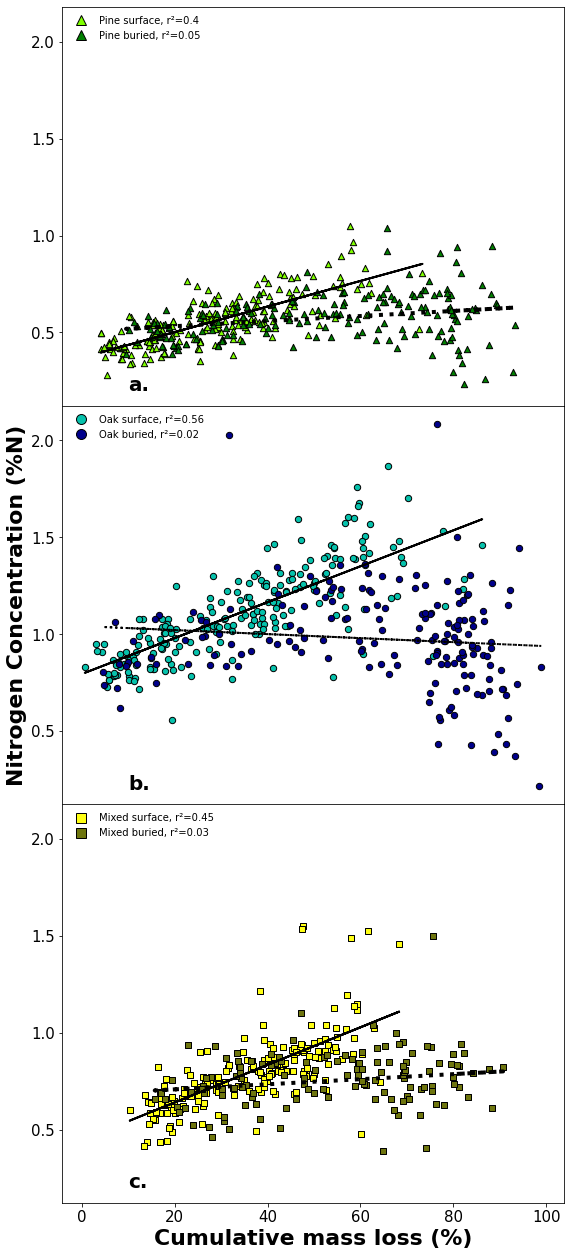

In [5]:
# Importing the nitrogen csv data file
nitrogen = pd.read_csv('/Users/preshitadave/Desktop/Dave_Preshita_BF550_Project2/Data/Fig4/nitrogen.csv')
nitrogen=nitrogen.dropna() # drop the NaN rows

# Importing the biomass csv data file
mass = pd.read_csv('/Users/preshitadave/Desktop/Dave_Preshita_BF550_Project2/Data/Fig4/biomass.csv')
mass = mass.dropna() # drop the NaN rows

#initial concentrations of Nitrogen in mg of N/ g of litter 
pine_t0 = 3.6 
oak_t0 = 7.2
mixed_t0 = 5.4

#mass of litter in g
initial_mass=5 

#calculating the cumulative mass loss % which is plotted on the X-axis 
mass['Cumulative mass loss %'] = 100-mass['Percent Mass remaining']

#calculating the mass remaining 
mass['Mass remaining'] = (initial_mass*mass['Percent Mass remaining'])/100
    
#splitting the  based on litter type
collection_nitrogen = nitrogen.groupby(['Litter type'])
collection_mass = mass.groupby(['Litter type'])

# create different df variables based on their litter type
for i in collection_nitrogen:
    if i[0]=='turkey oak':
        oak = i[1]
    elif i[0]=='pine':
        pine=i[1]
    else:
        mixed = i[1]
        
for i in collection_mass:
    if i[0]=='turkey oak':
        oak_mass = i[1]
    elif i[0]=='pine':
        pine_mass=i[1]
    else:
        mixed_mass = i[1]

# total concentration of Nitrogen in terms of mg in each litter type 
total_pine_t0=pine_t0*initial_mass
total_oak_t0=oak_t0*initial_mass 
total_mixed_t0=mixed_t0*initial_mass

# to calculate mass of nitrogen in each type of litter in terms of mg at different timepoints, blocks, positons, plots
pine['Conc of N'] = (total_pine_t0*pine['Percent N mass remaining'])/100
oak['Conc of N'] = (total_oak_t0*oak['Percent N mass remaining'])/100
mixed['Conc of N'] = (total_mixed_t0*mixed['Percent N mass remaining'])/100

# calculate the % of N concentration - the Y axis
pine['%N conc'] = (pine['Conc of N']*100)/(1000*pine_mass['Mass remaining'])
oak['%N conc'] = (oak['Conc of N']*100)/(1000*oak_mass['Mass remaining'])
mixed['%N conc'] = (mixed['Conc of N']*100)/(1000*mixed_mass['Mass remaining'])

#Split the litterfall based on their position
pine_surface = pine.loc[(pine['Position']=='Surface')]
pine_buried = pine.loc[(pine['Position']=='Buried')]
oak_surface = oak.loc[(oak['Position']=='Surface')]
oak_buried = oak.loc[(oak['Position']=='Buried')]
mixed_surface = mixed.loc[(mixed['Position']=='Surface')]
mixed_buried = mixed.loc[(mixed['Position']=='Buried')]

pine_surface_mass = pine_mass.loc[(pine_mass['Position']=='Surface')]
pine_buried_mass = pine_mass.loc[(pine_mass['Position']=='Buried')]
oak_surface_mass = oak_mass.loc[(oak_mass['Position']=='Surface')]
oak_buried_mass = oak_mass.loc[(oak_mass['Position']=='Buried')]
mixed_surface_mass = mixed_mass.loc[(mixed_mass['Position']=='Surface')]
mixed_buried_mass = mixed_mass.loc[(mixed_mass['Position']=='Buried')]

###################################
#Fig 4A
###################################

### To perform regression for pine surface
# Preparing the X and y dataset 
X= pine_surface_mass['Cumulative mass loss %'].values.reshape(-1,1)
y= pine_surface['%N conc'].values.reshape(-1,1)

# Creating training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15, random_state=0)

# Creating an object for Linear Regresison
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the model

# Evaluating the performance of the model
y_pred = regressor.predict(X_test)

#To retrieve the intercept:
pine_surface_b=regressor.intercept_ # b is beta or the intercept

#For retrieving the slope:
pine_surface_a=regressor.coef_ # a is alpha or the slope

# To retrieve the r2
pine_surface_r2=r2_score(y_test, y_pred)

# Creating a dict to store these stats
pine_surface_regr_stats={'a':pine_surface_a, 'b':pine_surface_b, 'r2':pine_surface_r2}


### To perform regression for pine buried
# Preparing the X and y dataset 
X= pine_buried_mass['Cumulative mass loss %'].values.reshape(-1,1)
y= pine_buried['%N conc'].values.reshape(-1,1)

# Creating training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Creating an object for Linear Regresison
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the model

# Evaluating the performance of the model
y_pred = regressor.predict(X_test)

#To retrieve the intercept:
pine_buried_b=regressor.intercept_ # b is beta or the intercept

#For retrieving the slope:
pine_buried_a=regressor.coef_ # a is alpha or the slope

# To retrieve the r2
pine_buried_r2=r2_score(y_test, y_pred)

# Creating a dict to store these stats
pine_buried_regr_stats={'a':pine_buried_a, 'b':pine_buried_b, 'r2':pine_buried_r2}


### To perform plotting 
fig = plt.figure(figsize=(9,22))
gs = gridspec.GridSpec(3, 1)   

ax1 = plt.subplot(gs[0], sharey=ax2)


ax1.xaxis.set_ticks(np.arange(0,101,20))
ax1.yaxis.set_ticks(np.arange(0.00,2.51,0.5))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# scatter plot for pine surface
ax1.scatter(pine_surface_mass['Cumulative mass loss %'], pine_surface['%N conc'], marker="^", edgecolors='black', c='chartreuse', label='Pine surface', s=40)
# scatter plot for pine buried
ax1.scatter(pine_buried_mass['Cumulative mass loss %'], pine_buried['%N conc'], marker="^", edgecolors='black', c='#008000', label='Pine buried', s=40)

#plotting the regression lines for pine_surface
x = pine_surface_mass['Cumulative mass loss %'].values.reshape(-1,1)
y = pine_surface_regr_stats['a']*x + pine_surface_regr_stats['b']
plt.plot(x, y, 'black', label='pine_surface', linewidth=2)


#plotting the regression lines for pine_buried
x = pine_buried_mass['Cumulative mass loss %'].values.reshape(-1,1)
y = pine_buried_regr_stats['a']*x + pine_buried_regr_stats['b']
plt.plot(x, y, 'black', label='pine_buried', linewidth=4, ls='dotted')

# creating the legend
legend_elements = (Line2D([0], [0], markerfacecolor='chartreuse', color='w', label='Pine surface, r\u00b2={}'.format(round(pine_surface_regr_stats['r2'],2)), marker = "^", markersize=10,markeredgecolor='black'),
                   Line2D([0], [0], markerfacecolor='#008000', color='w', label='Pine buried, r\u00b2={}'.format(round(pine_buried_regr_stats['r2'],2)), marker = "^", markersize=10,markeredgecolor='black'))
ax1.legend(handles=legend_elements, loc='upper left',  frameon=False)

# annotating the subplot 
ax1.annotate('a.', xy=(10,0.2), fontsize=20, fontweight='bold')

###################################
#Fig 4B
###################################
### To perform regression for oak surface
# Preparing the X and y dataset
X= oak_surface_mass['Cumulative mass loss %'].values.reshape(-1,1)
y= oak_surface['%N conc'].values.reshape(-1,1)

# Creating training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

# Creating an object for Linear Regresison
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the model 

# Evaluating the performance of the model
y_pred = regressor.predict(X_test)

#To retrieve the intercept:
oak_surface_b=regressor.intercept_ # b is beta or the intercept

#For retrieving the slope:
oak_surface_a=regressor.coef_ # a is alpha or the slope

# To retrieve the r2
oak_surface_r2=r2_score(y_test, y_pred)

# Creating a dict to store these stats
oak_surface_regr_stats={'a':oak_surface_a, 'b':oak_surface_b, 'r2':oak_surface_r2}


### To perform regression for oak buried
# Preparing the X and y dataset
X= oak_buried_mass['Cumulative mass loss %'].values.reshape(-1,1)
y= oak_buried['%N conc'].values.reshape(-1,1)

# Creating training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Creating an object for Linear Regresison
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the model

# Evaluating the performance of the model
y_pred = regressor.predict(X_test)

#To retrieve the intercept:
oak_buried_b=regressor.intercept_ # b is beta or the intercept

#For retrieving the slope:
oak_buried_a=regressor.coef_ # a is alpha or the slope

# To retrieve the r2
oak_buried_r2=r2_score(y_test, y_pred)

# Creating a dict to store these stats
oak_buried_regr_stats={'a':oak_buried_a, 'b':oak_buried_b, 'r2':oak_buried_r2}


### To perform plotting 

ax2 = plt.subplot(gs[1], sharex = ax1)

ax2.xaxis.set_ticks(np.arange(0,101,20))
ax2.yaxis.set_ticks(np.arange(0.00,2.51,0.5))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# scatter plot for oak surface
ax2.scatter(oak_surface_mass['Cumulative mass loss %'], oak_surface['%N conc'], marker="o", edgecolors='black', c='#06C2AC', label='Oak surface', s=40)
# scatter plot for oak buried
ax2.scatter(oak_buried_mass['Cumulative mass loss %'], oak_buried['%N conc'], marker="o", edgecolors='black', c='#00008B', label='Oak buried', s=40)

#plotting the regression lines for oak_surface
x = oak_surface_mass['Cumulative mass loss %'].values.reshape(-1,1)
y = oak_surface_regr_stats['a']*x + oak_surface_regr_stats['b']
plt.plot(x, y, 'black', label='oak_surface', linewidth=2)


#plotting the regression lines for oak_buried
x = oak_buried_mass['Cumulative mass loss %'].values.reshape(-1,1)
y = oak_buried_regr_stats['a']*x + oak_buried_regr_stats['b']
plt.plot(x, y, 'black', label='oak_buried', linewidth=2, ls='dotted')
# creating the legend
legend_elements = (Line2D([0], [0], markerfacecolor='#06C2AC', color='w', label='Oak surface, r\u00b2={}'.format(round(oak_surface_regr_stats['r2'],2)), marker = "o", markersize=10,markeredgecolor='black'),
                   Line2D([0], [0], markerfacecolor='#00008B', color='w', label='Oak buried, r\u00b2={}'.format(round(oak_buried_regr_stats['r2'],2)), marker = "o", markersize=10,markeredgecolor='black'))
ax2.legend(handles=legend_elements, loc='upper left',  frameon=False)
# annotating the subplot 
ax2.annotate('b.', xy=(10,0.2), fontsize=20, fontweight='bold')

###################################
#Fig 4C
###################################

### To perform regression for mixed surface
# Preparing the X and y data
X= mixed_surface_mass['Cumulative mass loss %'].values.reshape(-1,1)
y= mixed_surface['%N conc'].values.reshape(-1,1)

# Creating training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=1)

# Creating an object for Linear Regresison
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the model

# Evaluating the performance of the model
y_pred = regressor.predict(X_test)

#To retrieve the intercept:
mixed_surface_b=regressor.intercept_ # b is beta or the intercept

#For retrieving the slope:
mixed_surface_a=regressor.coef_ # a is alpha or the slope

# To retrieve the r2
mixed_surface_r2=r2_score(y_test, y_pred)

# Creating a dict to store these stats
mixed_surface_regr_stats={'a':mixed_surface_a, 'b':mixed_surface_b, 'r2':mixed_surface_r2}


### To perform regression for mixed buried
# Preparing the X and y data
X= mixed_buried_mass['Cumulative mass loss %'].values.reshape(-1,1)
y= mixed_buried['%N conc'].values.reshape(-1,1)

# Creating training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# Creating an object for Linear Regresison
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the model

# Evaluating the performance of the model
y_pred = regressor.predict(X_test)

#To retrieve the intercept:
mixed_buried_b=regressor.intercept_ # b is beta or the intercept

#For retrieving the slope:
mixed_buried_a=regressor.coef_ # a is alpha or the slope

# To retrieve the r2
mixed_buried_r2=r2_score(y_test, y_pred)

# Creating a dict to store these stats
mixed_buried_regr_stats={'a':mixed_buried_a, 'b':mixed_buried_b, 'r2':mixed_buried_r2}


### To perform plotting 
ax3 = plt.subplot(gs[2], sharex = ax2,sharey=ax2)

ax3.xaxis.set_ticks(np.arange(0,101,20))
ax3.yaxis.set_ticks(np.arange(0.00,2.51,0.5))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# scatter plot for mixed surface
ax3.scatter(mixed_surface_mass['Cumulative mass loss %'], mixed_surface['%N conc'], marker="s", edgecolors='black', c='#FFFF14', label='Mixed surface', s=40)
# scatter plot for mixed buried
ax3.scatter(mixed_buried_mass['Cumulative mass loss %'], mixed_buried['%N conc'], marker="s", edgecolors='black', c='#6E750E', label='Mixed buried', s=40)

#plotting the regression lines for mixed_surface
x = mixed_surface_mass['Cumulative mass loss %'].values.reshape(-1,1)
y = mixed_surface_regr_stats['a']*x + mixed_surface_regr_stats['b']
plt.plot(x, y, 'black', label='mixed_surface', linewidth=2)


#plotting the regression lines for mixed_buried
x = mixed_buried_mass['Cumulative mass loss %'].values.reshape(-1,1)
y = mixed_buried_regr_stats['a']*x + mixed_buried_regr_stats['b']
plt.plot(x, y, 'black', label='mixed_buried', linewidth=4, ls='dotted')

# creating the legend
legend_elements = (Line2D([0], [0], markerfacecolor='#FFFF14', color='w', label='Mixed surface, r\u00b2={}'.format(round(mixed_surface_regr_stats['r2'],2)), marker = "s", markersize=10,markeredgecolor='black'),
                   Line2D([0], [0], markerfacecolor='#6E750E', color='w', label='Mixed buried, r\u00b2={}'.format(round(mixed_buried_regr_stats['r2'],2)), marker = "s", markersize=10,markeredgecolor='black'))
ax3.legend(handles=legend_elements, loc='upper left', frameon=False)

# annotating the subplot 
ax3.annotate('c.', xy=(10,0.2), fontsize=20, fontweight='bold')

# Setting X and Y Axis labels for the entire plot
plt.xlabel('Cumulative mass loss (%)', fontsize=22, fontweight='bold')
ax2.set_ylabel('Nitrogen Concentration (%N)', fontsize=22, fontweight='bold')


plt.subplots_adjust(hspace=0.0) # adjusting the space between subplots as 0
plt.show()
# plt.savefig('fig4.png', dpi=1200) # to download the fig and the fig resolution can be set through dpi